<a href="https://colab.research.google.com/github/TaniaF2021/Predictive-analytics/blob/main/ML_Logistics_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the data
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [ ]:
df.head()
#finding out the headings and information in the first few rows

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
# getting more information about the data set
df.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                       68.95   35  ...  2016-03-27 00:53:11              0
1                       80.23   31  ...  2016-04-04 01:39:02              0
2                       69.47   26  ...  2016-03-13 20:35:42              0
3                       74.15   29  ...  2016-01-10 02:31:19              0
4                       68.37   35  ...  2016-06-03 03:36:18              0
..                        ...  ...  ...                  ...            ...
995                     72.97   30  ...  2016-02-11 21:49:00              1
996                     51.30   45  ...  2016-04-22 02:07:01              1
997                     51.63   51  ...  2016-02-01 17:24:57              1
998                     55.55   19  ...  2016-03-24 02:35:54              0
999                     45.01   26  ...  2016-06-03 21:43:21              1

[1000 rows x 10 columns]>

In [ ]:
# finding out the # of rows and columns
df.shape

(1000, 10)

In [ ]:
#finding out the column headers
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
# looking for missing values- looks like there is non
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
#creating a data frame for a few columns
data2= df[['Daily Time Spent on Site','Age','Daily Internet Usage','Area Income','Clicked on Ad']]
data2

,Daily Time Spent on Site,Age,Daily Internet Usage,Area Income,Clicked on Ad
0,68.95,35,256.09,61833.90,0
1,80.23,31,193.77,68441.85,0
2,69.47,26,236.50,59785.94,0
3,74.15,29,245.89,54806.18,0
4,68.37,35,225.58,73889.99,0
...,...,...,...,...,...
995,72.97,30,208.58,71384.57,1
996,51.30,45,134.42,67782.17,1
997,51.63,51,120.37,42415.72,1
998,55.55,19,187.95,41920.79,0


In [ ]:
type(data2)

pandas.core.frame.DataFrame

In [ ]:
# grouping some of the columns and finding the maximum numbers
df.groupby(['Daily Time Spent on Site'])['Age','Daily Internet Usage','Area Income'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Age,Daily Internet Usage,Area Income
Daily Time Spent on Site,,,
32.60,45,190.05,48206.04
32.84,40,171.72,41232.89
32.91,37,181.02,51691.55
32.99,45,177.46,49282.87
33.21,43,167.07,42650.32
...,...,...,...
90.97,37,180.77,54520.14
91.10,40,198.13,55499.69
91.15,38,184.98,36834.04


In [ ]:
#Assigning input variables

X = data2[[ 'Age','Daily Internet Usage','Area Income','Daily Time Spent on Site' ]]
X

,Age,Daily Internet Usage,Area Income,Daily Time Spent on Site
0,35,256.09,61833.90,68.95
1,31,193.77,68441.85,80.23
2,26,236.50,59785.94,69.47
3,29,245.89,54806.18,74.15
4,35,225.58,73889.99,68.37
...,...,...,...,...
995,30,208.58,71384.57,72.97
996,45,134.42,67782.17,51.30
997,51,120.37,42415.72,51.63
998,19,187.95,41920.79,55.55


In [ ]:
data2.dtypes

Daily Time Spent on Site    float64
Age                           int64
Daily Internet Usage        float64
Area Income                 float64
Clicked on Ad                 int64
dtype: object

In [ ]:
# assigning output variable
y=data2[['Clicked on Ad']]
y

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [ ]:
df.shape

(1000, 10)

In [ ]:
X.shape

(1000, 4)

In [ ]:
y.shape

(1000, 1)

In [ ]:
# BUILDING THE LOGISTICS REGRESSION MODEL

from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression()

In [ ]:
# TRAINING THE DATA SET
from sklearn.model_selection import train_test_split

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4)
(250, 4)
(750, 1)
(250, 1)


In [ ]:
logReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logReg.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test.values[0:10]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [ ]:
y_pred[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
logReg.score(x_test,y_test)

0.872

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.872

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[103,   9],
       [ 23, 115]])

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       112
           1       0.93      0.83      0.88       138

    accuracy                           0.87       250
   macro avg       0.87      0.88      0.87       250
weighted avg       0.88      0.87      0.87       250



In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'predicted value')

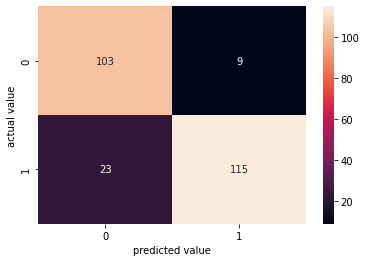

In [ ]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')

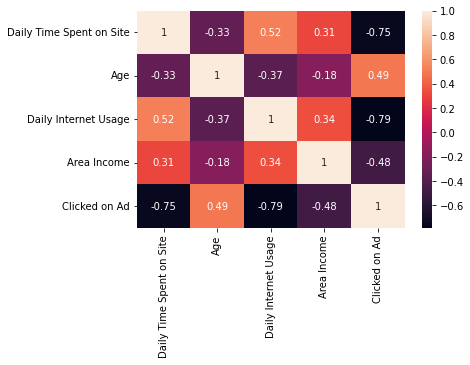

In [ ]:
sns.heatmap(data2.corr(),annot=True)

In [ ]:
#IN CONCLUSION
# the classification report shows 0.87% of the data
# per the confusion matrix the Accuracy = TP(115)+TN(103)/250 = .087 - which says the model is accurate.
# according to the heat map daily internet usage shows a positive correlation to the ad click rate. Although area of income shows
# a positive correalation to clicked on ads , it is less that 50% and therefore didnt make much of a difference.
# finally Age had a positive correlation with clicked on ads and it is close to 50% therefore once must conclude that daily time spent and Age had 
# positvie correaltion and more chances for the ads to be clicked as time progresses.
